In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha3/monan/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 799 images belonging to 10 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/baitapvenha3/monan/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 100 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'banhbeo': 0,
 'banhpia': 1,
 'banhtrangtron': 2,
 'banhxeo': 3,
 'bunthitnuong': 4,
 'chaca': 5,
 'comtam': 6,
 'hotvitlon': 7,
 'pho': 8,
 'tietcanh': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_47 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_49 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=500,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
25/25 [==============================] - 13s 468ms/step - loss: 2.9660 - accuracy: 0.1026 - val_loss: 2.2973 - val_accuracy: 0.0700
Epoch 2/500
25/25 [==============================] - 11s 423ms/step - loss: 2.2745 - accuracy: 0.1352 - val_loss: 2.2777 - val_accuracy: 0.1300
Epoch 3/500
25/25 [==============================] - 11s 424ms/step - loss: 2.1771 - accuracy: 0.2140 - val_loss: 2.3652 - val_accuracy: 0.2000
Epoch 4/500
25/25 [==============================] - 11s 424ms/step - loss: 2.1397 - accuracy: 0.2178 - val_loss: 2.2133 - val_accuracy: 0.2000
Epoch 5/500
25/25 [==============================] - 11s 424ms/step - loss: 2.0082 - accuracy: 0.2841 - val_loss: 2.2759 - val_accuracy: 0.1700
Epoch 6/500
25/25 [==============================] - 11s 423ms/step - loss: 2.0492 - accuracy: 0.2478 - val_loss: 2.1704 - val_accuracy: 0.1300
Epoch 7/500
25/25 [==============================] - 11s 422ms/step - loss: 1.9217 - accuracy: 0.3116 - val_loss: 2.1521 - val_accuracy:

<function matplotlib.pyplot.show>

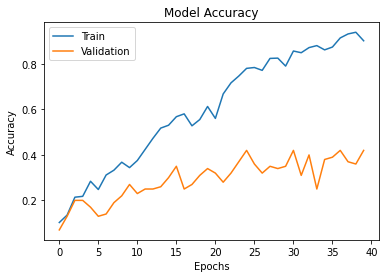

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_thuc_an.h5")

In [ ]:
model_nhandien=load_model('Nhan_dien_thuc_an.h5')

pho


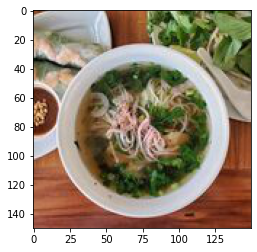

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/pho.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

hotvitlon


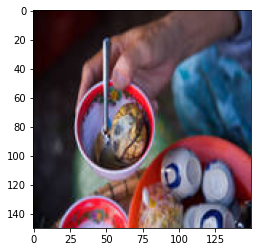

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/pho.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

comtam


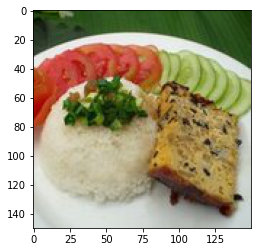

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/comtam.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

chaca


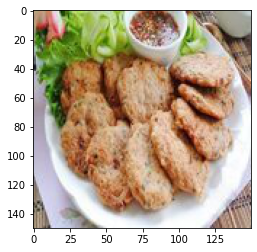

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/chaca.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

comtam


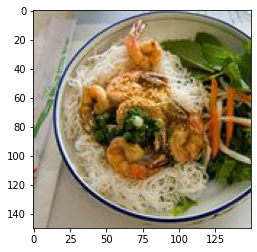

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/bunthitnuong.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

banhpia


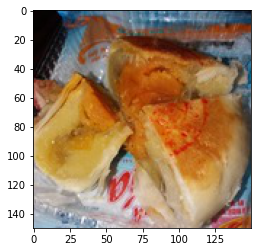

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/banhpia.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

banhxeo


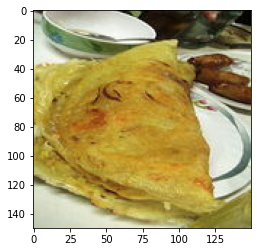

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/banhxeo.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

banhtrangtron


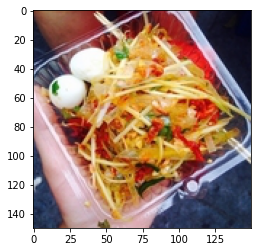

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/banhtrangtron.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

banhtrangtron


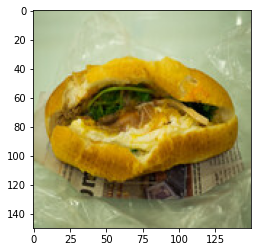

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/banhmi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)

banhbeo


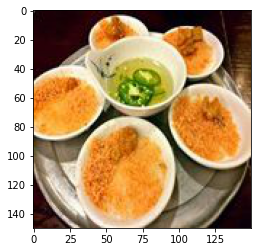

In [ ]:
img=load_img("/content/drive/MyDrive/baitapvenha3/monan/test/banhbeo.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhbeo'
if round(result[0][1])==1:
  prediction='banhpia'
if round(result[0][2])==1:
  prediction='banhtrangtron'
if round(result[0][3])==1:
  prediction='banhxeo'
if round(result[0][4])==1:
  prediction='bunthitnuong'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='comtam'
if round(result[0][7])==1:
  prediction='hotvitlon'
if round(result[0][8])==1:
  prediction='pho'
if round(result[0][9])==1:
  prediction='tietcanh'
print(prediction)